### Import Libraries and Data

In [25]:
# import library python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
# import dataset

data=pd.read_csv('datasets/contraceptive/cmc.data',names=['Wife Age','Wife Education','Husband Education','Children',
                                                'Wife religion','Wife working','Husband Occupation','SOLI',
                                                'Media Exposure','Contraceptive Method'])

# 1. Business Understanding

The Indonesian government has conducted a survey on contraceptive prevalence. The research sample consists of interviews with non-pregnant women. The purpose of this survey is to predict the selection of contraceptive methods (no use, long-term methods, or short-term methods) based on demographic and socio-economic characteristics.

(Source: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice)

# 2. Data Understanding

In [27]:
# Viewing data
data.head()

,Wife Age,Wife Education,Husband Education,Children,Wife religion,Wife working,Husband Occupation,SOLI,Media Exposure,Contraceptive Method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [28]:
# Viewing the data dimensions.
data.shape

(1473, 10)

The dataset 'cmc.data' consists of 1473 data points and 10 attributes/features.

In [29]:
# Viewing the names of attributes and their data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Wife Age              1473 non-null   int64
 1   Wife Education        1473 non-null   int64
 2   Husband Education     1473 non-null   int64
 3   Children              1473 non-null   int64
 4   Wife religion         1473 non-null   int64
 5   Wife working          1473 non-null   int64
 6   Husband Occupation    1473 non-null   int64
 7   SOLI                  1473 non-null   int64
 8   Media Exposure        1473 non-null   int64
 9   Contraceptive Method  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


# 3. Data Preparation

### 3.1. Check Missing Value

In [30]:
# Checking for the presence of missing values.
data.isnull().sum()

Wife Age                0
Wife Education          0
Husband Education       0
Children                0
Wife religion           0
Wife working            0
Husband Occupation      0
SOLI                    0
Media Exposure          0
Contraceptive Method    0
dtype: int64

The missing value count for all attributes is 0 (zero), which can be interpreted as there are no missing data in each attribute.

### 3.2. Exploratory Data Analysis

#### 3.2.1. Univariate Analysis

##### Hisotgram Bar

<Axes: xlabel='Wife Age', ylabel='Count'>

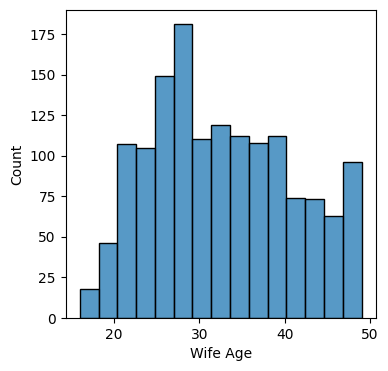

In [31]:
# Attribute Wife Age
plt.figure(figsize=(4,4))
sns.histplot(data['Wife Age'])

##### Bar Plot

<Axes: xlabel='Wife Education', ylabel='count'>

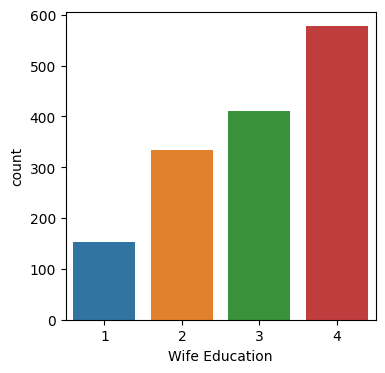

In [32]:
# Wife Education
plt.figure(figsize=(4,4))
sns.countplot(x=data['Wife Education'], data=data)

##### Bar Plot

<Axes: xlabel='Contraceptive Method', ylabel='count'>

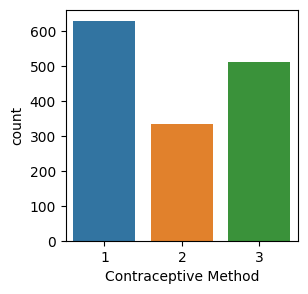

In [33]:
# Contraceptive Method Choices
plt.figure(figsize=(3,3))
sns.countplot(x=data['Contraceptive Method'], data=data)

##### Box Plot

<Axes: xlabel='Children'>

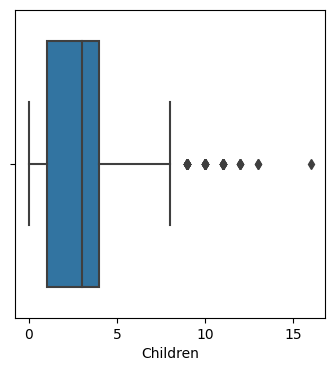

In [34]:
# Children

plt.figure(figsize=(4,4))
sns.boxplot(x=data['Children'], data=data)

#### 3.2.2. Bivariate Analysis

##### Scatter Plot

<Axes: xlabel='Wife Age', ylabel='Children'>

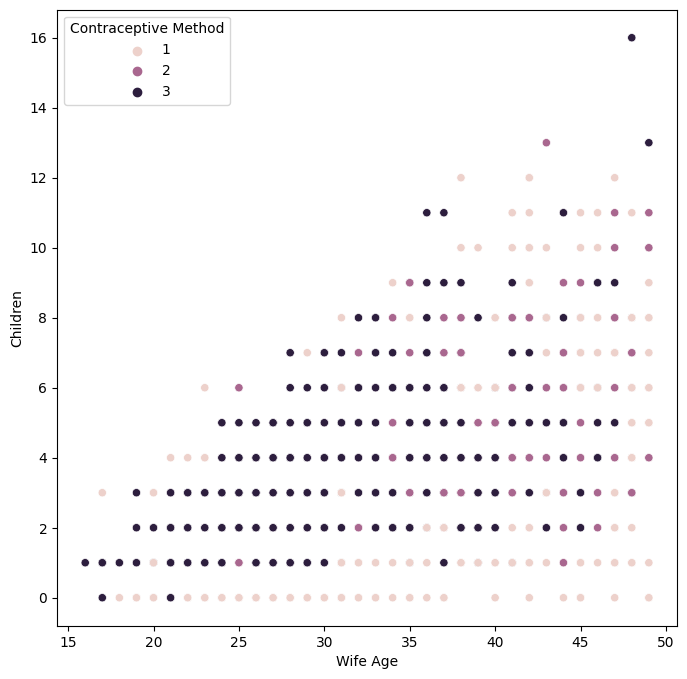

In [35]:
# Correlation between Wife Age and Number of Children

plt.figure(figsize=(8,8))
sns.scatterplot(x= data['Wife Age'], y=data['Children'], hue=data['Contraceptive Method'])

From the scatter plot above, it can be seen that there is no correlation between the "Wife Age" attribute and the "Children" attribute.

### 3.3. Data Transformation and Sampling

In [36]:
data['Wife Education'].value_counts()

Wife Education
4    577
3    410
2    334
1    152
Name: count, dtype: int64

In [37]:
data['Husband Education'].value_counts()

Husband Education
4    899
3    352
2    178
1     44
Name: count, dtype: int64

In [38]:
data['Wife religion'].value_counts()

Wife religion
1    1253
0     220
Name: count, dtype: int64

In [39]:
data['Wife working'].value_counts()

Wife working
1    1104
0     369
Name: count, dtype: int64

In [40]:
data['Husband Occupation'].value_counts()

Husband Occupation
3    585
1    436
2    425
4     27
Name: count, dtype: int64

In [41]:
data['SOLI'].value_counts()

SOLI
4    684
3    431
2    229
1    129
Name: count, dtype: int64

In [42]:
data['Media Exposure'].value_counts()

Media Exposure
0    1364
1     109
Name: count, dtype: int64

In [43]:
data['Contraceptive Method'].value_counts()

Contraceptive Method
1    629
3    511
2    333
Name: count, dtype: int64

In [44]:
data.head()

,Wife Age,Wife Education,Husband Education,Children,Wife religion,Wife working,Husband Occupation,SOLI,Media Exposure,Contraceptive Method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


#### Correlation Matrix

In [45]:
# Examine correlations between attributes

correlation = data.corr()
correlation

,Wife Age,Wife Education,Husband Education,Children,Wife religion,Wife working,Husband Occupation,SOLI,Media Exposure,Contraceptive Method
Wife Age,1.000000,-0.048011,-0.052879,0.540126,-0.139543,-0.039880,-0.202532,0.184485,0.113306,-0.162953
Wife Education,-0.048011,1.000000,0.618369,-0.193839,-0.232973,-0.062200,-0.395921,0.361450,-0.336080,0.149777
Husband Education,-0.052879,0.618369,1.000000,-0.187513,-0.178447,0.001099,-0.337003,0.357490,-0.288691,0.103226
Children,0.540126,-0.193839,-0.187513,1.000000,0.073917,0.097316,-0.023000,-0.006046,0.133658,0.082772
Wife religion,-0.139543,-0.232973,-0.178447,0.073917,1.000000,0.069837,0.084417,-0.196308,0.060243,-0.025271
Wife working,-0.039880,-0.062200,0.001099,0.097316,0.069837,1.000000,0.014232,-0.076505,0.001828,0.054438
Husband Occupation,-0.202532,-0.395921,-0.337003,-0.023000,0.084417,0.014232,1.000000,-0.293831,0.113925,0.018161
SOLI,0.184485,0.361450,0.357490,-0.006046,-0.196308,-0.076505,-0.293831,1.000000,-0.251359,0.091149
Media Exposure,0.113306,-0.336080,-0.288691,0.133658,0.060243,0.001828,0.113925,-0.251359,1.000000,-0.119206
Contraceptive Method,-0.162953,0.149777,0.103226,0.082772,-0.025271,0.054438,0.018161,0.091149,-0.119206,1.000000


<Axes: >

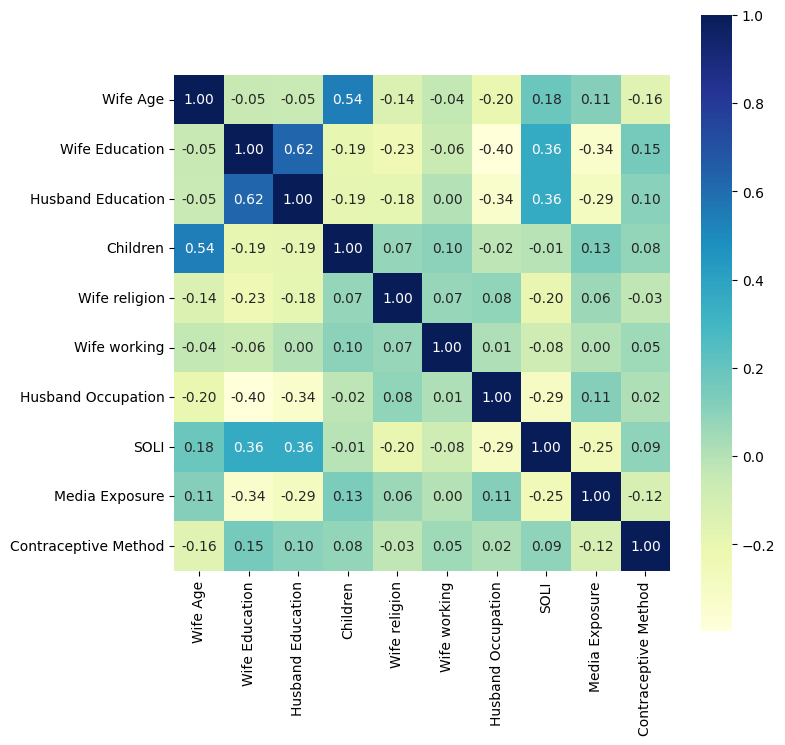

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='YlGnBu')

# 4. Modeling

In [47]:
# Separate regular attributes and class

x = data.drop(columns='Contraceptive Method')
y = data['Contraceptive Method']
y.value_counts()

Contraceptive Method
1    629
3    511
2    333
Name: count, dtype: int64

In [48]:
# Split the data into training data and testing data with a ratio of 75% for training data and 25% for testing data.

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

print('data training:')
print(xtrain.shape)
print(ytrain.shape)
print('----------------')
print('data testing:')
print(xtest.shape)
print(ytest.shape)

data training:
(1104, 9)
(1104,)
----------------
data testing:
(369, 9)
(369,)


### 4.1. Algorithm k-NN

In [66]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2, metric='euclidean')

# perform training
knn.fit(xtrain, ytrain)

# Perform classification using the k-NN algorithm.
ypred_knn = knn.predict(xtest)

# Calculate accuracy
print("Accouracy score of K-NN algorithm:", accuracy_score(ytest, ypred_knn))

Accouracy score of K-NN algorithm: 0.5013550135501355


In [67]:
print(classification_report(ytest, ypred_knn))

              precision    recall  f1-score   support

           1       0.61      0.62      0.62       162
           2       0.47      0.38      0.42        96
           3       0.38      0.43      0.40       111

    accuracy                           0.50       369
   macro avg       0.49      0.48      0.48       369
weighted avg       0.50      0.50      0.50       369



<Axes: >

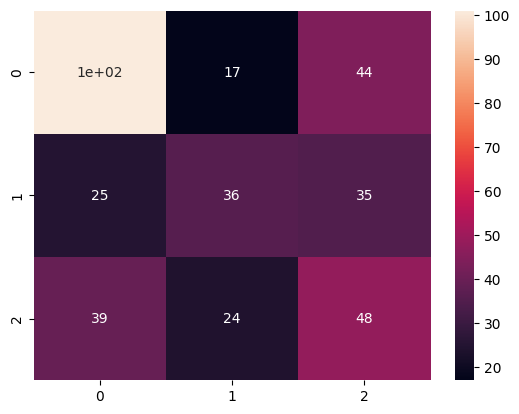

In [69]:
cf_matrix = confusion_matrix(ytest, ypred_knn)
sns.heatmap(cf_matrix, annot=True)

### 4.3. Algorithm Naive Bayes

In [53]:
nb = GaussianNB()

# perform training
nb.fit(xtrain, ytrain)

# Perform classification using the Naive Bayes algorithm.
ypred = nb.predict(xtest)

# Calculate accuracy
print("Accuracy score of NB classifier is", accuracy_score(ytest, ypred))

Accuracy score of NB classifier is 0.45528455284552843


In [54]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.60      0.40      0.48       162
           2       0.41      0.58      0.48        96
           3       0.38      0.42      0.40       111

    accuracy                           0.46       369
   macro avg       0.46      0.47      0.45       369
weighted avg       0.48      0.46      0.46       369



<Axes: >

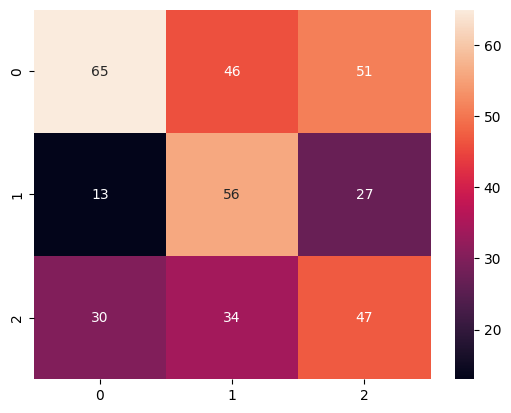

In [55]:
cf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(cf_matrix, annot=True)

### 4.3. Algorithm Decision Tree

In [59]:
dt = DecisionTreeClassifier()

# perform training
dt.fit(xtrain, ytrain)

# Perform classification using the Decision Tree algorithm.
ypred_dt = dt.predict(xtest)

# Calculate accuracy
print("Accuracy score of Decision Tree Algorithm: ", accuracy_score(ytest, ypred_dt))

Accuracy score of Decision Tree Algorithm:  0.47696476964769646


In [60]:
print(classification_report(ytest,ypred_dt))

              precision    recall  f1-score   support

           1       0.59      0.61      0.60       162
           2       0.39      0.36      0.38        96
           3       0.37      0.38      0.38       111

    accuracy                           0.48       369
   macro avg       0.45      0.45      0.45       369
weighted avg       0.47      0.48      0.48       369



<Axes: >

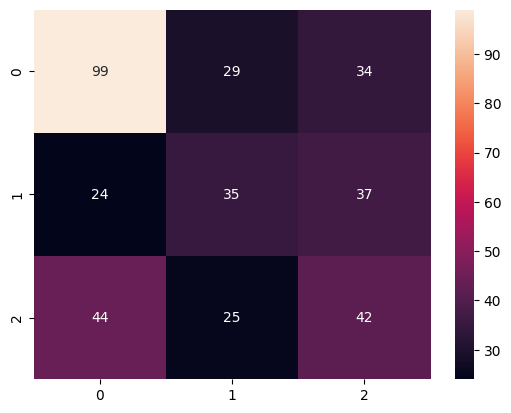

In [61]:
cf_matrix = confusion_matrix(ytest, ypred_dt)
sns.heatmap(cf_matrix, annot=True)

# 5. Evaluation

##### Algorithm Comparison k-NN, Naive Bayes, and Decision Tree

In [62]:
models = [knn, nb, dt]
accuracy_value = []
for model in models:
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    accuracy_value.append(accuracy)
print(accuracy_value)

[0.5013550135501355, 0.45528455284552843, 0.47696476964769646]


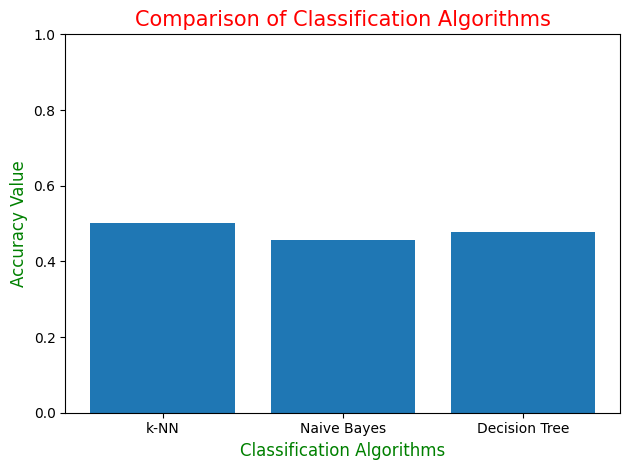

In [65]:
plt.bar(['k-NN', 'Naive Bayes', 'Decision Tree'], accuracy_value)
plt.ylim(0.00, 1.00)
plt.title("Comparison of Classification Algorithms", fontsize=15, color='r')
plt.xlabel('Classification Algorithms', fontsize=12, color='g')
plt.ylabel('Accuracy Value', fontsize=12, color='g')
plt.tight_layout()
plt.show()

From the three algorithms above, it can be seen that the k-NN algorithm produces the highest accuracy value for contraception selection classification.